In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DATA_SCIENCE_and_AI/DS102_HocMayThongKe/Do_An'
# path = '/content/drive/MyDrive/HocMayThongKe_TH'


In [ ]:
import os
os.chdir(path)

In [ ]:
!pip3 install fairseq
!pip3 install fastbpe
!pip3 install vncorenlp
!pip3 install transformers

  Using cached fairseq-0.12.2.tar.gz (9.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11291798 sha256=685a50924a25fe4b0fb63d21630672f02cf3963c88cd50ae2580ebc00974649b
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141210 sha256=2e558bc129a927

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


**Lưu kết quả thử nghiệm**

In [ ]:
# Creating model results
name = []
acc_test = []
precision_test = []
recall_test = []
f1_test = []

#storing the results
def storeResults(model, a, b, c, d):
    name.append(model)
    acc_test.append(round(a, 4))
    precision_test.append(round(b, 4))
    recall_test.append(round(c, 4))
    f1_test.append(round(d, 4))

**Tách từ, xóa stopword**

In [ ]:
X_train = pd.read_csv(path+'/dataset/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset/test/label.csv').reset_index()
X_dev = pd.read_csv(path+'/dataset/dev/data.csv').reset_index()
y_dev = pd.read_csv(path+'/dataset/dev/label.csv').reset_index()
# train_id.extend(X_train['index'].tolist())
# from sklearn.model_selection import train_test_split
# train_sents, val_sents, train_labels, val_labels = train_test_split(train_text, train_label, test_size=0.1)

**Không tách từ, không xóa stopword**

In [ ]:
X_train = pd.read_csv(path+'/dataset3/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset3/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset3/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset3/test/label.csv').reset_index()
X_dev = pd.read_csv(path+'/dataset3/dev/data.csv').reset_index()
y_dev = pd.read_csv(path+'/dataset3/dev/label.csv').reset_index()

**Tách từ, không xóa stopword**

In [ ]:
X_train = pd.read_csv(path+'/dataset2/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset2/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset2/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset2/test/label.csv').reset_index()
X_dev = pd.read_csv(path+'/dataset2/dev/data.csv').reset_index()
y_dev = pd.read_csv(path+'/dataset2/dev/label.csv').reset_index()

In [ ]:
X_train

,index,Unnamed: 0,0
0,0,0,Bất ngờ ở vòng chung kết giải bóng rổ sinh viê...
1,1,1,"Tắc ống dẫn tinh có con được không, . Tắc ống ..."
2,2,2,Thống kê tệ hại của Man Utd dưới thời HLV Erik...
3,3,3,Sẽ có thuốc tiêm giúp trẻ hóa 50% và giảm tóc ...
4,4,4,Vụ quỹ phụ huynh 310 triệu đồng Trách nhiệm củ...
...,...,...,...
2085,2085,2085,Bà Thái Hương nhận giải nhà lãnh đạo phát triể...
2086,2086,2086,Vén màn bí mật Giám đốc thương hiệu chia sẻ 1 ...
2087,2087,2087,Trung Quốc ra mắt siêu máy tính thế hệ mới. Si...
2088,2088,2088,HLV Huỳnh Đức chấn thương. Bình Dương HLV Lê H...


In [ ]:
train_id, train_sents, train_label = [], [], []
test_id, test_text = [], []

train_id = X_train['index'].values
train_sents = X_train['0'].values
train_labels = y_train['Topic'].values

test_id = X_train['index'].values
test_text = X_test['0'].values
test_label = y_test['Topic'].values

val_id = X_dev['index'].values
val_sents = X_dev['0'].values
val_labels = y_dev['Topic'].values

# train_sents, val_sents, train_labels, val_labels = train_test_split(train_text, train_label, test_size=0.1)


In [ ]:
val_id

In [ ]:
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
label_to_number = {label: number for number, label in enumerate(label_class)}

In [ ]:
label_to_number

{'Thời sự': 0,
 'Bất động sản': 1,
 'Kinh doanh': 2,
 'Khoa học và công nghệ': 3,
 'Giải trí': 4,
 'Thể thao': 5,
 'Giáo dục': 6,
 'Sức khỏe': 7}

In [ ]:
train_labels = [label_to_number[label] for label in train_labels]
test_label = [label_to_number[label] for label in test_label]
val_labels = [label_to_number[label] for label in val_labels]

In [ ]:
!wget https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
!tar -xzvf PhoBERT_base_fairseq.tar.gz

--2023-12-31 02:01:05--  https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
Resolving public.vinai.io (public.vinai.io)... 13.227.219.120, 13.227.219.12, 13.227.219.93, ...
Connecting to public.vinai.io (public.vinai.io)|13.227.219.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1243308020 (1.2G) [application/x-tar]
Saving to: ‘PhoBERT_base_fairseq.tar.gz’

PhoBERT_base_fairse 100%[===================>]   1.16G  20.6MB/s    in 57s     

2023-12-31 02:02:03 (20.8 MB/s) - ‘PhoBERT_base_fairseq.tar.gz’ saved [1243308020/1243308020]

PhoBERT_base_fairseq/
PhoBERT_base_fairseq/bpe.codes
PhoBERT_base_fairseq/model.pt
PhoBERT_base_fairseq/dict.txt


In [ ]:
!ls PhoBERT_base_fairseq

ls: cannot access 'PhoBERT_base_fairseq': No such file or directory


In [ ]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

--2023-12-31 02:02:25--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 13.227.219.12, 13.227.219.99, 13.227.219.93, ...
Connecting to public.vinai.io (public.vinai.io)|13.227.219.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz’

PhoBERT_base_transf 100%[===================>] 307.47M  24.5MB/s    in 14s     

2023-12-31 02:02:40 (22.4 MB/s) - ‘PhoBERT_base_transformers.tar.gz’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


In [ ]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes',
    # default="/content/drive/MyDrive/HocMayThongKe_TH/PhoBERT_base_transformers/bpe.codes",
    default="/content/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/PhoBERT_base_transformers/dict.txt")
# vocab.add_from_file("/content/drive/MyDrive/HocMayThongKe_TH/PhoBERT_base_transformers/dict.txt")


In [ ]:
bpe.encode('Hôm_nay trời nóng quá nên tôi ở nhà viết Viblo!')

'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !'

In [ ]:
vocab.encode_line('<s> ' + 'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !' + ' </s>')

tensor([    0,  3791,  1027,   898,   204,    77,    70,    25,    69,   467,
         3696, 16856,   381,     2,     2], dtype=torch.int32)

In [ ]:
train_sents

array(['Bất ngờ ở vòng chung kết giải bóng rổ sinh viên toàn quốc. Bất ngờ đã xảy ra ở vòng chung kết giải bóng rổ sinh viên toàn quốc (NUC) 2023 tại Hà Nội khi đội đương kim vô địch nội dung nam là Trường ĐH RMIT thất thủ.',
       'Tắc ống dẫn tinh có con được không, . Tắc ống dẫn tinh có thể do nguyên nhân bẩm sinh hoặc mắc phải, tuy nhiên nếu tinh hoàn vẫn còn sản xuất tinh trùng thì quý ông vẫn có thể có con.',
       'Thống kê tệ hại của Man Utd dưới thời HLV Erik Ten Hag. Trận thua Newcastle của Man Utd khiến tương lai HLV Erik Ten Hag thêm bấp bênh, nhất là khi người hâm mộ nhìn vào thống kê tệ hại của Quỷ đỏ dưới thời chiến lược gia người Hà Lan.',
       ...,
       'Trung Quốc ra mắt siêu máy tính thế hệ mới. Siêu máy tính thế hệ mới Tianhe Xingyi ra mắt hôm 6/12 hoạt động tốt hơn cả siêu máy tính Tianhe-2 nổi tiếng từng giữ danh hiệu nhanh nhất thế giới nhiều năm.',
       'HLV Huỳnh Đức chấn thương. Bình Dương HLV Lê Huỳnh Đức gần như không thể đứng dậy chỉ đạo khi Bình Dư

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 50

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)

test_ids = []
for sent in test_text:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    test_ids.append(encoded_sent)


train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
test_ids = pad_sequences(test_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")


In [ ]:
train_ids

array([[    0, 46149,  3217, ...,  9901,   542,     8],
       [    0, 27530,  2308, ...,     5,     2,     2],
       [    0, 10080,  4931, ...,  1961,     7,  4194],
       ...,
       [    0,  1007,  3019, ...,   570,   681,    36],
       [    0,   456,  8973, ...,     0,     0,     0],
       [    0,  8602,  2276, ...,  4368,    14,  1287]])

In [ ]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]
    val_masks.append(mask)

test_masks = []
for sent in test_ids:
    mask = [int(token_id > 0) for token_id in sent]
    test_masks.append(mask)


In [ ]:
train_masks

In [ ]:
train_labels

In [ ]:
train_labels

In [ ]:
len(val_labels)

233

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

train_inputs = torch.tensor(train_ids)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)

val_inputs = torch.tensor(val_ids)
val_labels = torch.tensor(val_labels)
val_masks = torch.tensor(val_masks)

test_inputs = torch.tensor(test_ids)
test_labels = torch.tensor(test_label)
test_masks = torch.tensor(test_masks)


train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=16)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=16)


In [ ]:
import torch

# Kiểm tra xem GPU có khả dụng không
if torch.cuda.is_available():
    device = torch.device("cuda")
    # print("GPU is available.")
else:
    device = torch.device("cpu")
    # print("GPU is not available. Switching to CPU.")

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    # "/content/drive/MyDrive/HocMayThongKe_TH/PhoBERT_base_transformers/config.json", from_tf=False, num_labels=8, output_hidden_states=False,
    "/content/PhoBERT_base_transformers/config.json", from_tf=False, num_labels=8, output_hidden_states=False,
)
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    # "/content/drive/MyDrive/HocMayThongKe_TH/PhoBERT_base_transformers/model.bin",
    "/content/PhoBERT_base_transformers/model.bin",
    config=config
)
BERT_SA.to(device)



You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /content/PhoBERT_base_transformers/model.bin and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=0)
      (position_embeddings): Embedding(258, 768, padding_idx=0)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
device

device(type='cuda')

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)
    return accuracy
def flat_f1(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    f1 = f1_score(labels_flat, pred_flat, average='macro')
    return f1

In [ ]:
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm_notebook
# device = 'cpu'
epochs = 10

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0

    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()

        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        tmp_train_f1 = flat_f1(logits, label_ids)
        train_f1 += tmp_train_f1
        nb_train_steps += 1

        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))
    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for batch in tqdm_notebook(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT_SA(b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            tmp_eval_accuracy = flat_accuracy(logits, label_ids)
            eval_accuracy += tmp_eval_accuracy

            tmp_eval_f1 = flat_f1(logits, label_ids)
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")


======== Epoch 1 / 10 ========
Training...


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.7385
 F1 score: 0.6760
 Average training loss: 0.9427
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8750
 F1 score: 0.8195
======== Epoch 2 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9084
 F1 score: 0.8760
 Average training loss: 0.3371
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8917
 F1 score: 0.8293
======== Epoch 3 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9518
 F1 score: 0.9314
 Average training loss: 0.1809
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8792
 F1 score: 0.8295
======== Epoch 4 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9733
 F1 score: 0.9622
 Average training loss: 0.1115
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8917
 F1 score: 0.8370
======== Epoch 5 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9823
 F1 score: 0.9734
 Average training loss: 0.0734
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8833
 F1 score: 0.8335
======== Epoch 6 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9895
 F1 score: 0.9848
 Average training loss: 0.0473
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8792
 F1 score: 0.8250
======== Epoch 7 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9938
 F1 score: 0.9925
 Average training loss: 0.0318
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8917
 F1 score: 0.8538
======== Epoch 8 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9962
 F1 score: 0.9946
 Average training loss: 0.0193
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8750
 F1 score: 0.8246
======== Epoch 9 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9981
 F1 score: 0.9983
 Average training loss: 0.0092
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8917
 F1 score: 0.8413
======== Epoch 10 / 10 ========
Training...


<ipython-input-139-0b60195c6c66>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step, batch in tqdm_notebook(enumerate(train_dataloader)):


0it [00:00, ?it/s]

 Accuracy: 0.9986
 F1 score: 0.9989
 Average training loss: 0.0062
Running Validation...


<ipython-input-139-0b60195c6c66>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(val_dataloader):


  0%|          | 0/15 [00:00<?, ?it/s]

 Accuracy: 0.8792
 F1 score: 0.8346
Training complete!


In [ ]:
# len(test_dataloader)

In [ ]:


# Chuyển mô hình về chế độ đánh giá
BERT_SA.eval()

# Tạo danh sách để lưu trữ dự đoán và nhãn thực tế
predictions = []
true_labels = []

# Duyệt qua tập kiểm thử
for batch in tqdm_notebook(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = BERT_SA(b_input_ids,
                          token_type_ids=None,
                          attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Lưu trữ dự đoán và nhãn thực tế
        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)

# Tính toán các độ đo hiệu suất
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions,average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')


<ipython-input-140-cfed518d13e9>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(test_dataloader):


  0%|          | 0/37 [00:00<?, ?it/s]

Test Accuracy: 0.9019
Test Precision: 0.9020
Test Recall: 0.9036
Test F1 Score: 0.9021


In [ ]:
# storeResults('Tach_tu_Xoa_stopword', accuracy, precision, recall, f1)

In [ ]:
# storeResults('Khong tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResults('Tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
results = pd.DataFrame({ 'name': name,
    'Accuracy': acc_test,
    'Precision': precision_test,
    'Recall': recall_test,
    'F1': f1_test})
results

,name,Accuracy,Precision,Recall,F1
0,Tach_tu_Xoa_stopword,0.8847,0.8844,0.8833,0.8834
1,"Khong tach tu, khong xoa stopword",0.8778,0.8765,0.8804,0.8761
2,"Tach tu, khong xoa stopword",0.9019,0.9020,0.9036,0.9021


**Tách từ, không xóa stopword**

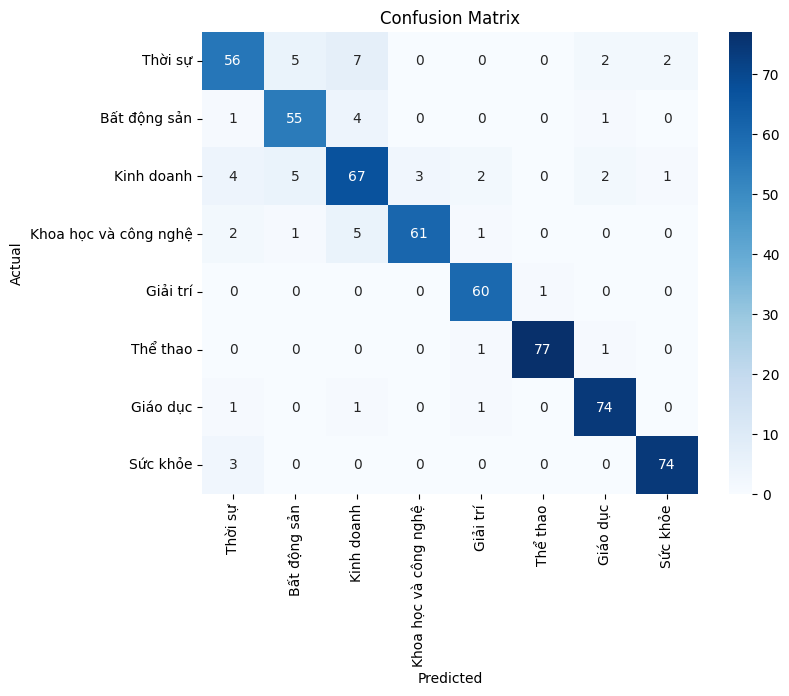

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Tạo ma trận nhầm lẫn
cm = confusion_matrix(true_labels, predictions)

# Hiển thị ma trận nhầm lẫn bằng seaborn và matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
